In [52]:
from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [30]:
counter = 0

In [35]:
def partition(L, low, high):
    
    i = low
    pivot = L[low]
 
    for j in range(low + 1, high):
        global counter
        counter = counter + 1
        if L[j] <= pivot:
            i = i+1
            L[i], L[j] = L[j], L[i]
 
    L[low],L[i] = L[i],L[low]
    return i + 1

In [36]:
def quicksort(L, low, high):
    if low < high:
        p = partition(L, low, high)
        quicksort(L, low, p - 1)
        quicksort(L, p, high)

In [37]:
# Sample space
universe = range(1000000)

In [38]:
# Create samples
num_samples = 100
sample_length = 301
samples = []
for i in range(num_samples):
    new_sample = []
    while len(new_sample) < sample_length:
        new_element = random.choice(universe)
        if not new_element in new_sample: 
            new_sample.append(new_element)
    samples.append(new_sample)

In [44]:
def random_median(sample):
    n = len(sample)
    R_len = int(math.ceil(n**(3/4)))
    R = [random.choice(sample) for i in range(R_len)]
    quicksort(R, 0, R_len)
    d_pos = int(math.floor(1/2*n**(3/4) - math.sqrt(n)))
    u_pos = int(math.floor(1/2*n**(3/4) + math.sqrt(n)))
    d = R[d_pos]
    u = R[u_pos]
    C = [x for x in sample if x <= u and x >= d]
    l_d = len([x for x in sample if x < d])
    l_u = len([x for x in sample if x > u])
    if l_d > n / 2 or l_u > n / 2:
        return 'FAIL'
    if len(C) <= 4 * n ** (3/4):
        quicksort(C, 0, len(C))
    else:
        return 'FAIL'
    counter + 2*n
    return C[int(math.floor(n / 2) - l_d)]

In [47]:
random_medians = []
actual_medians = []
steps = []
for sample in samples:
    counter = 0
    random_medians.append(random_median(sample))
    actual_medians.append(int(np.median(sample)))
    steps.append(counter)

In [51]:
# Are there any failed attempts? 
False in [random_medians[i] == actual_medians[i] for i in range(len(random_medians))]

False

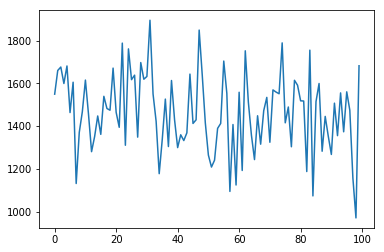

In [54]:
plt.plot(steps)
plt.show()

In [55]:
np.mean(steps)

1462.68

In [56]:
np.std(steps)

180.57573923426148